# Cálculo de las variables TARGET
### Se van a generar 4 variables que usaremos como TARGET en el modelo predictivo, que son las competencias que tiene cada alumno, en Matemáticas, Ciencia, Lectura y Global.
### El cuestionario PISA tiene calculadas estas competencias como 10 variables plausibles, para Matemáticas, Ciencia y Global y 40 para Lectura, ya que en 2018, se centro en la lectura.
### En las propias instrucciones PISA desaconsejan utilizar como valor de la competencia como una media de estas 10 variables pausibles: https://www.oecd.org/pisa/data/httpoecdorgpisadatabase-instructions.htm
### Es por este motivo que nos hemos decantado por por hacer un análisis factorial de las variables en su cojunto, para luego utilizar los 4 primeros factores como estas competencias
### Utilizaremos 2 métodos de analisis factorial, uno sin rotación, y otro con rotación varimax, por lo que obtendremos 8 target, más adelante cuando se realice el modelo, utilizaremos definitivamente, los target calculados con un método o con otro

In [1]:
##LECTURA DEL FICHERO SPSS Y SUS METADATOS
##Debe estar instalado el paquete de pyreadstat que permite leer ficheros SPSS y SAS
import pyreadstat
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
df, meta = pyreadstat.pyreadstat.read_sav('estudiantesESP1.sav')

In [3]:
#Columnas plausibles
d1 = df.iloc[:, 1026:1096]

In [4]:
#d1.dropna(inplace=True)
d1.loc[0]

PV1MATH     462.846
PV2MATH     479.586
PV3MATH     404.056
PV4MATH     447.710
PV5MATH     517.438
             ...   
PV6RCER     411.543
PV7RCER     455.602
PV8RCER     436.687
PV9RCER     418.236
PV10RCER    444.082
Name: 0, Length: 70, dtype: float64

In [5]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(d1)
kmo_model

0.9945136074889883

# Método sin rotación

In [6]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.set_params(n_factors=4)
#fa.analyze(df, 25, rotation=None)
fa.fit(d1)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([5.53120720e+01, 2.19798145e+00, 1.07086604e+00, 6.92929505e-01,
       4.46049299e-01, 4.21046716e-01, 2.94260996e-01, 2.86953248e-01,
       2.85955281e-01, 2.82871478e-01, 2.81045717e-01, 2.76469566e-01,
       2.73036117e-01, 2.71186446e-01, 2.67891586e-01, 2.66573539e-01,
       2.60182889e-01, 2.58247936e-01, 2.57161296e-01, 2.54200667e-01,
       2.52639653e-01, 2.52534599e-01, 2.49146716e-01, 2.45103493e-01,
       2.20587371e-01, 1.84446705e-01, 1.81618947e-01, 1.75425385e-01,
       1.72635592e-01, 1.71257491e-01, 1.68690849e-01, 1.61807152e-01,
       1.60586876e-01, 1.56573719e-01, 1.41775005e-01, 1.40710676e-01,
       1.37160905e-01, 1.36375618e-01, 1.33400355e-01, 1.29930151e-01,
       1.27080667e-01, 1.25396443e-01, 1.20740233e-01, 1.19754082e-01,
       1.17721572e-01, 1.14765179e-01, 1.12735751e-01, 1.09934896e-01,
       1.08120206e-01, 1.04454593e-01, 1.01528783e-01, 9.17010854e-02,
       6.99930080e-02, 6.97383422e-02, 6.80185200e-02, 6.73924887e-02,
      

In [7]:
fa.n_factors

4

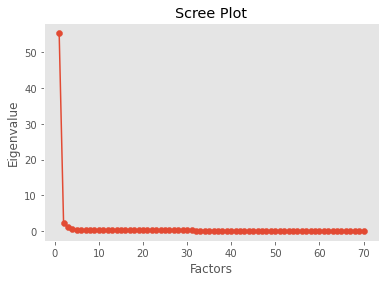

In [8]:
# Create scree plot using matplotlib
plt.scatter(range(1,d1.shape[1]+1),ev)
plt.plot(range(1,d1.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [9]:
ev_aux=ev[1:70]

In [10]:
ev

array([5.53120720e+01, 2.19798145e+00, 1.07086604e+00, 6.92929505e-01,
       4.46049299e-01, 4.21046716e-01, 2.94260996e-01, 2.86953248e-01,
       2.85955281e-01, 2.82871478e-01, 2.81045717e-01, 2.76469566e-01,
       2.73036117e-01, 2.71186446e-01, 2.67891586e-01, 2.66573539e-01,
       2.60182889e-01, 2.58247936e-01, 2.57161296e-01, 2.54200667e-01,
       2.52639653e-01, 2.52534599e-01, 2.49146716e-01, 2.45103493e-01,
       2.20587371e-01, 1.84446705e-01, 1.81618947e-01, 1.75425385e-01,
       1.72635592e-01, 1.71257491e-01, 1.68690849e-01, 1.61807152e-01,
       1.60586876e-01, 1.56573719e-01, 1.41775005e-01, 1.40710676e-01,
       1.37160905e-01, 1.36375618e-01, 1.33400355e-01, 1.29930151e-01,
       1.27080667e-01, 1.25396443e-01, 1.20740233e-01, 1.19754082e-01,
       1.17721572e-01, 1.14765179e-01, 1.12735751e-01, 1.09934896e-01,
       1.08120206e-01, 1.04454593e-01, 1.01528783e-01, 9.17010854e-02,
       6.99930080e-02, 6.97383422e-02, 6.80185200e-02, 6.73924887e-02,
      

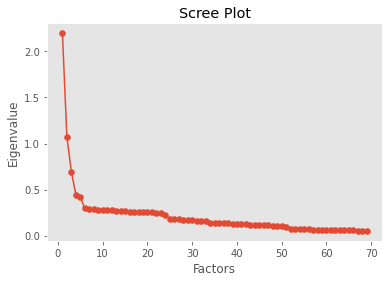

In [11]:
plt.scatter(range(1,d1.shape[1]),ev_aux)
plt.plot(range(1,d1.shape[1]),ev_aux)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [12]:
fa.loadings_.shape

(70, 4)

### Factor de Lectura: El primer factor tiene sentido que sea el de Lectura, ya que coincide su peso con las variables plausibles dedicadas a la Lectura

<BarContainer object of 70 artists>

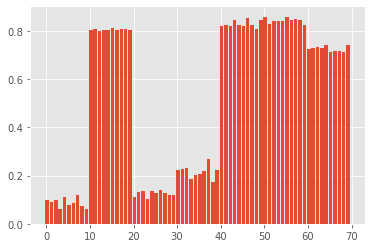

In [13]:
mapeado=range(70)
plt.bar([x+0.2 for x in mapeado],fa.loadings_.transpose()[0])

### Factor de Matemáticas: El segundo factor tiene sentido que sea el de Matemáticas, ya que coincide su peso con las variables plausibles dedicadas a Matemáticas

<BarContainer object of 70 artists>

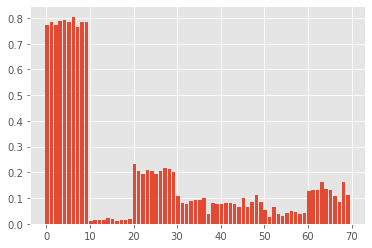

In [14]:
mapeado=range(70)
plt.bar([x+0.2 for x in mapeado],fa.loadings_.transpose()[1])

### Factor de Competencia global: El tercer factor tiene sentido que sea el de Competencía Global, ya que coincide su peso con las variables plausibles dedicadas a Competencía Global

<BarContainer object of 70 artists>

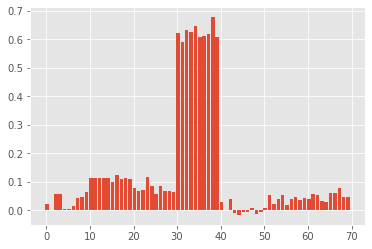

In [15]:
mapeado=range(70)
plt.bar([x+0.2 for x in mapeado],fa.loadings_.transpose()[2])

### Factor de Competencia ciencia: El cuarto factor tiene sentido que sea el de Ciencias, ya que coincide su peso con las variables plausibles dedicadas a Ciencia

<BarContainer object of 70 artists>

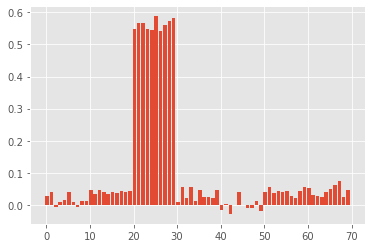

In [16]:
mapeado=range(70)
plt.bar([x+0.2 for x in mapeado],fa.loadings_.transpose()[3])

In [17]:
fa.loadings_

array([[ 1.00245568e-01,  7.71992483e-01,  2.12211362e-02,
         2.70144191e-02],
       [ 9.10419308e-02,  7.83545148e-01,  2.10075468e-03,
         4.16518279e-02],
       [ 9.75977855e-02,  7.71193689e-01,  5.79731957e-02,
        -5.31484470e-03],
       [ 6.10883639e-02,  7.89481311e-01,  5.89141167e-02,
         8.94405218e-03],
       [ 1.09143058e-01,  7.90408215e-01,  3.40555430e-03,
         1.39182420e-02],
       [ 7.99202641e-02,  7.85803069e-01,  6.33833618e-03,
         3.99535133e-02],
       [ 8.60797735e-02,  8.05041278e-01,  1.44219041e-02,
         7.67799736e-03],
       [ 1.18130455e-01,  7.64294929e-01,  4.16062955e-02,
        -7.60964777e-03],
       [ 7.44811720e-02,  7.85874818e-01,  4.58869472e-02,
         1.12704216e-02],
       [ 6.18953062e-02,  7.83075499e-01,  6.41875573e-02,
         1.22930976e-02],
       [ 8.01596150e-01,  1.12279879e-02,  1.14768702e-01,
         4.67733494e-02],
       [ 8.09709183e-01,  1.43027046e-02,  1.14624849e-01,
      

### Generamos las variables TARGET de cada registro, multiplicando los pesos de los factores a cada variable plausible

In [18]:
resultado = np.matmul(d1.to_numpy(),fa.loadings_)

### Normalizamos los resultados

In [19]:
from sklearn.preprocessing import normalize
data = normalize(resultado, axis=0, norm='max')
print(data)

[[0.58610904 0.63513224 0.57669192 0.60953758]
 [0.74438067 0.75289408 0.75984997 0.71570542]
 [0.83200473 0.85749559 0.79611331 0.82722559]
 ...
 [0.73372196 0.7491285  0.71769574 0.69398004]
 [0.8308217  0.86303453 0.82088087 0.83862316]
 [0.80111185 0.8227837  0.79152041 0.759658  ]]


### Hacemos una pequeña comprobación de coherencia, y se comprueba que los alumnos que sus valores plausibles son menores, efectivamente sus variables TARGET son menores de otros alumnos que tienen valores plausibles más altos

In [20]:
data[0]

array([0.58610904, 0.63513224, 0.57669192, 0.60953758])

In [21]:
print("Variables plausibles Matemáticas")
print(d1.values[0,0:10])
print("Variables plausibles Lectura")
print(d1.values[0,10:20])
print("Variables plausibles Ciencias")
print(d1.values[0,20:30])
print("Variables plausibles Globales")
print(d1.values[0,30:40])

Variables plausibles Matemáticas
[462.846 479.586 404.056 447.71  517.438 487.041 413.501 521.821 492.305
 456.026]
Variables plausibles Lectura
[398.571 462.683 417.306 448.816 430.852 457.67  466.77  457.976 465.463
 454.947]
Variables plausibles Ciencias
[382.892 414.668 428.708 481.002 467.633 514.629 565.666 476.991 473.242
 437.731]
Variables plausibles Globales
[413.862 489.386 404.186 435.349 486.702 432.444 458.678 386.521 453.97
 451.725]


In [22]:
data[2]

array([0.83200473, 0.85749559, 0.79611331, 0.82722559])

In [23]:
print("Variables plausibles Matemáticas")
print(d1.values[2,0:10])
print("Variables plausibles Lectura")
print(d1.values[2,10:20])
print("Variables plausibles Ciencias")
print(d1.values[2,20:30])
print("Variables plausibles Globales")
print(d1.values[2,30:40])

Variables plausibles Matemáticas
[586.723 655.22  578.656 643.228 602.914 597.525 659.336 674.028 617.384
 581.032]
Variables plausibles Lectura
[595.139 663.241 625.061 646.557 584.038 631.15  648.823 612.318 633.671
 612.12 ]
Variables plausibles Ciencias
[586.453 621.134 642.681 648.995 622.229 628.634 622.172 644.589 621.66
 617.954]
Variables plausibles Globales
[616.454 641.133 619.07  715.138 603.079 626.772 567.849 583.131 559.569
 558.693]


# Método con rotación varimax

In [24]:
# Create factor analysis object and perform factor analysis
fa2 = FactorAnalyzer()
fa2.set_params(n_factors=4, rotation='varimax')
#fa.analyze(df, 25, rotation=None)
fa2.fit(d1)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([5.53120720e+01, 2.19798145e+00, 1.07086604e+00, 6.92929505e-01,
       4.46049299e-01, 4.21046716e-01, 2.94260996e-01, 2.86953248e-01,
       2.85955281e-01, 2.82871478e-01, 2.81045717e-01, 2.76469566e-01,
       2.73036117e-01, 2.71186446e-01, 2.67891586e-01, 2.66573539e-01,
       2.60182889e-01, 2.58247936e-01, 2.57161296e-01, 2.54200667e-01,
       2.52639653e-01, 2.52534599e-01, 2.49146716e-01, 2.45103493e-01,
       2.20587371e-01, 1.84446705e-01, 1.81618947e-01, 1.75425385e-01,
       1.72635592e-01, 1.71257491e-01, 1.68690849e-01, 1.61807152e-01,
       1.60586876e-01, 1.56573719e-01, 1.41775005e-01, 1.40710676e-01,
       1.37160905e-01, 1.36375618e-01, 1.33400355e-01, 1.29930151e-01,
       1.27080667e-01, 1.25396443e-01, 1.20740233e-01, 1.19754082e-01,
       1.17721572e-01, 1.14765179e-01, 1.12735751e-01, 1.09934896e-01,
       1.08120206e-01, 1.04454593e-01, 1.01528783e-01, 9.17010854e-02,
       6.99930080e-02, 6.97383422e-02, 6.80185200e-02, 6.73924887e-02,
      

In [25]:
fa2.n_factors

4

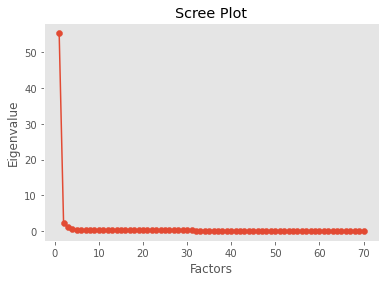

In [26]:
# Create scree plot using matplotlib
plt.scatter(range(1,d1.shape[1]+1),ev)
plt.plot(range(1,d1.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [27]:
ev_aux=ev[1:70]

In [28]:
ev

array([5.53120720e+01, 2.19798145e+00, 1.07086604e+00, 6.92929505e-01,
       4.46049299e-01, 4.21046716e-01, 2.94260996e-01, 2.86953248e-01,
       2.85955281e-01, 2.82871478e-01, 2.81045717e-01, 2.76469566e-01,
       2.73036117e-01, 2.71186446e-01, 2.67891586e-01, 2.66573539e-01,
       2.60182889e-01, 2.58247936e-01, 2.57161296e-01, 2.54200667e-01,
       2.52639653e-01, 2.52534599e-01, 2.49146716e-01, 2.45103493e-01,
       2.20587371e-01, 1.84446705e-01, 1.81618947e-01, 1.75425385e-01,
       1.72635592e-01, 1.71257491e-01, 1.68690849e-01, 1.61807152e-01,
       1.60586876e-01, 1.56573719e-01, 1.41775005e-01, 1.40710676e-01,
       1.37160905e-01, 1.36375618e-01, 1.33400355e-01, 1.29930151e-01,
       1.27080667e-01, 1.25396443e-01, 1.20740233e-01, 1.19754082e-01,
       1.17721572e-01, 1.14765179e-01, 1.12735751e-01, 1.09934896e-01,
       1.08120206e-01, 1.04454593e-01, 1.01528783e-01, 9.17010854e-02,
       6.99930080e-02, 6.97383422e-02, 6.80185200e-02, 6.73924887e-02,
      

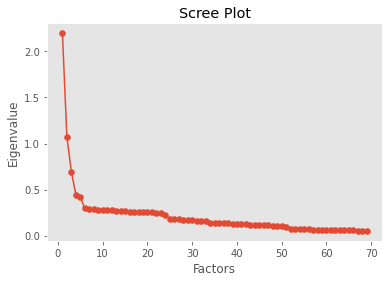

In [29]:
plt.scatter(range(1,d1.shape[1]),ev_aux)
plt.plot(range(1,d1.shape[1]),ev_aux)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [30]:
fa2.loadings_.shape

(70, 4)

### Factor de Lectura: El primer factor tiene sentido que sea el de Lectura, ya que coincide su peso con las variables plausibles dedicadas a la Lectura

<BarContainer object of 70 artists>

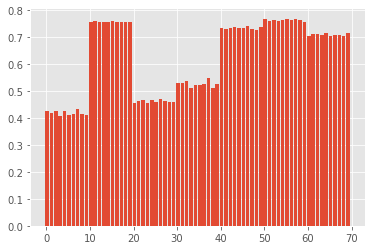

In [31]:
mapeado=range(70)
plt.bar([x+0.2 for x in mapeado],fa2.loadings_.transpose()[0])

### Factor de Matemáticas: El segundo factor tiene sentido que sea el de Matemáticas, ya que coincide su peso con las variables plausibles dedicadas a Matemáticas

<BarContainer object of 70 artists>

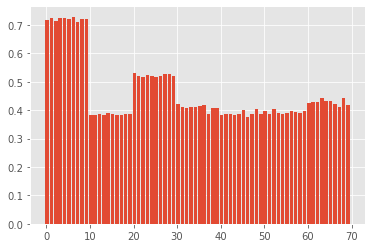

In [32]:
mapeado=range(70)
plt.bar([x+0.2 for x in mapeado],fa2.loadings_.transpose()[1])

### Factor de Competencia global: El tercer factor tiene sentido que sea el de Competencía Global, ya que coincide su peso con las variables plausibles dedicadas a Competencía Global

<BarContainer object of 70 artists>

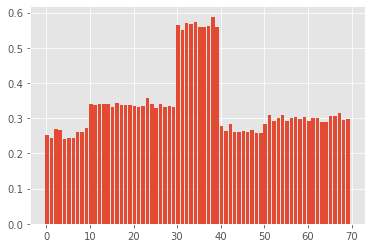

In [33]:
mapeado=range(70)
plt.bar([x+0.2 for x in mapeado],fa2.loadings_.transpose()[2])

### Factor de Competencia ciencia: El cuarto factor tiene sentido que sea el de Ciencias, ya que coincide su peso con las variables plausibles dedicadas a Ciencia

<BarContainer object of 70 artists>

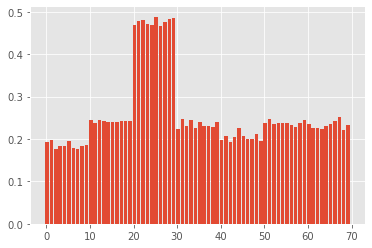

In [34]:
mapeado=range(70)
plt.bar([x+0.2 for x in mapeado],fa2.loadings_.transpose()[3])

### Generamos las variables TARGET de cada registro, multiplicando los pesos de los factores a cada variable plausible

In [35]:
resultado2 = np.matmul(d1.to_numpy(),fa2.loadings_)

### Normalizamos los resultados

In [36]:
from sklearn.preprocessing import normalize
data2 = normalize(resultado2, axis=0, norm='max')
print(data)

[[0.58610904 0.63513224 0.57669192 0.60953758]
 [0.74438067 0.75289408 0.75984997 0.71570542]
 [0.83200473 0.85749559 0.79611331 0.82722559]
 ...
 [0.73372196 0.7491285  0.71769574 0.69398004]
 [0.8308217  0.86303453 0.82088087 0.83862316]
 [0.80111185 0.8227837  0.79152041 0.759658  ]]


### Hacemos una pequeña comprobación de coherencia, y se comprueba que los alumnos que sus valores plausibles son menores, efectivamente sus variables TARGET son menores de otros alumnos que tienen valores plausibles más altos

In [37]:
data2[0]

array([0.59666611, 0.60956686, 0.60133592, 0.60769756])

In [38]:
print("Variables plausibles Matemáticas")
print(d1.values[0,0:10])
print("Variables plausibles Lectura")
print(d1.values[0,10:20])
print("Variables plausibles Ciencias")
print(d1.values[0,20:30])
print("Variables plausibles Globales")
print(d1.values[0,30:40])

Variables plausibles Matemáticas
[462.846 479.586 404.056 447.71  517.438 487.041 413.501 521.821 492.305
 456.026]
Variables plausibles Lectura
[398.571 462.683 417.306 448.816 430.852 457.67  466.77  457.976 465.463
 454.947]
Variables plausibles Ciencias
[382.892 414.668 428.708 481.002 467.633 514.629 565.666 476.991 473.242
 437.731]
Variables plausibles Globales
[413.862 489.386 404.186 435.349 486.702 432.444 458.678 386.521 453.97
 451.725]


In [39]:
data2[2]

array([0.83649604, 0.84323576, 0.83633192, 0.84287019])

In [40]:
print("Variables plausibles Matemáticas")
print(d1.values[2,0:10])
print("Variables plausibles Lectura")
print(d1.values[2,10:20])
print("Variables plausibles Ciencias")
print(d1.values[2,20:30])
print("Variables plausibles Globales")
print(d1.values[2,30:40])

Variables plausibles Matemáticas
[586.723 655.22  578.656 643.228 602.914 597.525 659.336 674.028 617.384
 581.032]
Variables plausibles Lectura
[595.139 663.241 625.061 646.557 584.038 631.15  648.823 612.318 633.671
 612.12 ]
Variables plausibles Ciencias
[586.453 621.134 642.681 648.995 622.229 628.634 622.172 644.589 621.66
 617.954]
Variables plausibles Globales
[616.454 641.133 619.07  715.138 603.079 626.772 567.849 583.131 559.569
 558.693]


# Eliminar las variables sobrantes del Dataset inicial, e incluir las 8 variables target calculadas

In [41]:
#Variables de pesos y plausibles que no se van a utilizar
col_eli = df.iloc[:, 941:1118].columns

In [42]:
#borramos las columnad
df2 = df.drop(col_eli, axis=1)

In [43]:
# Añadimos cada variable TARGET al dataframe como nueva columna
lec1 = data[:,0]
mat1 = data[:,1]
glo1 = data[:,2]
cie1 = data[:,3]
lec2 = data2[:,0]
mat2 = data2[:,1]
glo2 = data2[:,2]
cie2 = data2[:,3]
df2['LECTURA1'] = lec1
df2['MATES1'] = mat1
df2['CIENCIA1'] = glo1
df2['GLOBAL1'] = cie1
df2['LECTURA2'] = lec2
df2['MATES2'] = mat2
df2['CIENCIA2'] = glo2
df2['GLOBAL2'] = cie2

In [44]:
df2

,CNTRYID,CNT,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,OECD,ADMINMODE,...,GCAWAREP,test,LECTURA1,MATES1,CIENCIA1,GLOBAL1,LECTURA2,MATES2,CIENCIA2,GLOBAL2
0,724.0,ESP,72400001.0,72400490.0,07MS,072400,ESP9028,7240000,1.0,2.0,...,NaN,NaN,0.586109,0.635132,0.576692,0.609538,0.596666,0.609567,0.601336,0.607698
1,724.0,ESP,72400001.0,72401482.0,07MS,072400,ESP9028,7240000,1.0,2.0,...,NaN,NaN,0.744381,0.752894,0.759850,0.715705,0.749909,0.752305,0.758363,0.751188
2,724.0,ESP,72400001.0,72402362.0,07MS,072400,ESP9028,7240000,1.0,2.0,...,NaN,NaN,0.832005,0.857496,0.796113,0.827226,0.836496,0.843236,0.836332,0.842870
3,724.0,ESP,72400001.0,72402959.0,07MS,072400,ESP9028,7240000,1.0,2.0,...,NaN,NaN,0.514129,0.560212,0.540197,0.552421,0.528629,0.541695,0.540430,0.542919
4,724.0,ESP,72400001.0,72403316.0,07MS,072400,ESP9028,7240000,1.0,2.0,...,NaN,NaN,0.748630,0.720412,0.757500,0.679666,0.746114,0.738673,0.751130,0.738106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35938,724.0,ESP,72401102.0,72421796.0,07MS,072400,ESP9013,7240000,1.0,2.0,...,NaN,NaN,0.678839,0.694708,0.717064,0.668215,0.688511,0.693371,0.701855,0.693659
35939,724.0,ESP,72401102.0,72425905.0,07MS,072400,ESP9013,7240000,1.0,2.0,...,NaN,NaN,0.830551,0.826280,0.847201,0.799105,0.834995,0.834609,0.844056,0.836343
35940,724.0,ESP,72401102.0,72426602.0,07MS,072400,ESP9013,7240000,1.0,2.0,...,NaN,NaN,0.733722,0.749129,0.717696,0.693980,0.735940,0.739085,0.737609,0.734141
35941,724.0,ESP,72401102.0,72444251.0,07MS,072400,ESP9013,7240000,1.0,2.0,...,NaN,NaN,0.830822,0.863035,0.820881,0.838623,0.839750,0.848758,0.845455,0.849479


In [45]:
df2.to_csv('EstudiantesTar.csv')